In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# dataset api
!kaggle datasets download -d vaishnaviasonawane/indian-sign-language-dataset

100% 268M/268M [00:09<00:00, 33.1MB/s]
100% 268M/268M [00:09<00:00, 29.3MB/s]


In [4]:
!ls

indian-sign-language-dataset.zip  kaggle.json  sample_data


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/indian-sign-language-dataset.zip'

with ZipFile(dataset, 'r') as zip :
  zip.extractall()
  print("THE DATASET IS EXTRACTED.")

THE DATASET IS EXTRACTED.


In [6]:
!ls

data  indian-sign-language-dataset.zip	kaggle.json  sample_data


In [7]:
!ls data

1  3  5  7  9  B  D  F	H  J  L  N  P  R  T  V	X  Z
2  4  6  8  A  C  E  G	I  K  M  O  Q  S  U  W	Y


# **IMPORTING THE DEPENDENCIES**

In [8]:
import cv2
import os
import random
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import keras.utils as image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Directory containing your subdirectories
base_dir = 'data/'

# List all subdirectories
subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

total_images = 0

# Iterate through the subdirectories
for subdirectory_name in subdirectories:
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # Count the number of image files in each subdirectory
    image_files = [file for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]
    total_images += len(image_files)

# Print the total number of images in the dataset
print(f'Total number of images in the dataset: {total_images}')

Total number of images in the dataset: 42000


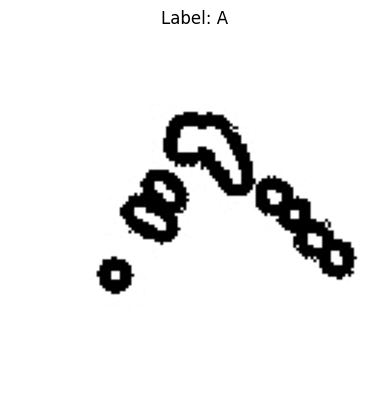

In [20]:
class BinaryImageProcessing:

    def __init__(self, base_dir='data/'):
        self.base_dir = base_dir

    def convert_to_binary_images(self):
        for subdirectory_name in os.listdir(self.base_dir):
            subdirectory_path = os.path.join(self.base_dir, subdirectory_name)

            for file_name in os.listdir(subdirectory_path):
                image_path = os.path.join(subdirectory_path, file_name)

                # Read the image in grayscale
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Apply adaptive thresholding
                binary_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                   cv2.THRESH_BINARY, 11, 2)

                # Save the binary image back to the original location
                cv2.imwrite(os.path.join(subdirectory_path, f'binary_{file_name}'), binary_img)

    def display_binary_image_with_label(self, subdirectory_name):
        subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
        binary_image_files = [file for file in os.listdir(subdirectory_path) if file.startswith('binary_')]

        if binary_image_files:
            first_binary_image_path = os.path.join(subdirectory_path, binary_image_files[0])

            # Load the binary image using OpenCV
            binary_img = cv2.imread(first_binary_image_path, cv2.IMREAD_GRAYSCALE)

            # Display the binary image
            plt.imshow(binary_img, cmap='gray')
            plt.title(f"Label: {subdirectory_name}")
            plt.axis('off')
            plt.show()
        else:
            print(f'No binary images found in the directory: {subdirectory_name}')


# Create an instance of BinaryImageProcessing
binary_image_processor = BinaryImageProcessing()

# Convert images to binary using adaptive thresholding
binary_image_processor.convert_to_binary_images()

# Specify the subdirectory you want to display (replace 'A' with the desired subdirectory)
subdirectory_name_to_display_binary = 'A'

# Display the first binary image with label for the specified subdirectory
binary_image_processor.display_binary_image_with_label(subdirectory_name_to_display_binary)
